# Linear Support Vector Classifier, aka, Linear SVC

https://scikit-learn.org/stable/modules/svm.html#svm-regression  
Support vector machines (SVMs) are a set of supervised learning methods used for classification, regression and outliers detection.

The advantages of support vector machines are:

- Effective in high dimensional spaces.

- Still effective in cases where number of dimensions is greater than the number of samples.

- Uses a subset of training points in the decision function (called support vectors), so it is also memory efficient.

- Versatile: different Kernel functions can be specified for the decision function. Common kernels are provided, but it is also possible to specify custom kernels.

The disadvantages of support vector machines include:

- If the number of features is much greater than the number of samples, avoid over-fitting in choosing Kernel functions and regularization term is crucial.

- SVMs do not directly provide probability estimates, these are calculated using an expensive five-fold cross-validation (see Scores and probabilities, below).


## Intuition:
$$ wx_i-b >=1, \text{    if } y_i=1 \\

wx_i-b <=-1, \text{    if } y_i=-1$$  
Therefore:

$$ y_i(w*x_i +b)>=1$$

## In this notebook, we implement a simple linear SVC which minizize the following loss function:

$$ l = \min_{w,b} \lambda w^Tw+\frac{1}{n}\sum_{i=1}max(0,1-y_i(w^T\phi(x_i)+b)) $$ where $\phi$ is the identity function for Linear SVC
The term inside $\sum$ is a hinge loss that is a convex function.   
  
The first term $\lambda w^Tw$ is the margin maximizer (note $margin = \frac{1}{ \left\lVert w\right\rVert ^2}$), and $\lambda$  controls how important we want this term to be; the second term is the loss function: we minimize misclassified observations
  
It is not differentiable but has a subgradient w.r.t. $w$  

$$\frac{\partial l_i}{\partial w_i} = 
\begin{cases}
    2\lambda w_i - x_iy_i, & \text{if } y_i(w^T\phi(x_i)+b)<1\\
    2\lambda w_i,             & \text{otherwise}
\end{cases}
$$

$$\frac{\partial l}{\partial b} = 
\begin{cases}
    - y_i, & \text{if } y_i(w^T\phi(x_i)+b)<1\\
    0,             & \text{otherwise}
\end{cases}
$$

Therefore, our update step would be
$$ w_{t+1} = w_t - \gamma \frac{\partial l_i}{\partial w_{t}}$$ 
$$ b_{t+1} = b_t - \gamma \frac{\partial l_i}{\partial b_{t}}$$
$\gamma$ is the learning rate

In [5]:
import numpy as np

In [94]:
class LinearSVC:
    def __init__(self,gamma = 0.0001,lambdaa = 0.01, n_iters=2000):
        self.gamma = gamma # learning rate
        self.lambdaa = lambdaa # coefficient of the constraint 
        self.n_iters = n_iters
        self.w = None
        self.b = 0
    
    def fit(self,X,y):
        if not all(np.unique(y) == np.array([-1,  1])): # convert to -1 and 1
            y = np.where(y==0,-1,1)
        n_instance,n_feature = X.shape
        self.w = np.zeros(n_feature)
        for _ in range(self.n_iters):
            for idx,x_i in enumerate(X):
                if y[idx]*(self.w.T@x_i+self.b)<1: # this is where loss occurs
                    self.w = self.w - self.gamma*(2*self.lambdaa*self.w-x_i*y[idx])
                    self.b = self.b-self.gamma*(-y[idx])
                else: # 
                    self.w = self.w - self.gamma*(2*self.lambdaa*self.w)
        
        
    def predict(self,X):
        y_raw = X@self.w+self.b
        return np.sign(y_raw)

### Case 1: separable

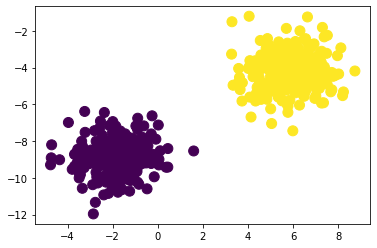

In [111]:
from sklearn.datasets import make_blobs
X,y = make_blobs(n_samples=500, centers = 2, n_features = 2, random_state=40)

import matplotlib.pyplot as plt
plt.scatter(X[:,0],X[:,1],c=y,s=100)

In [112]:
model = LinearSVC()

In [115]:
model.fit(X,y)
y_pred = model.predict(X)

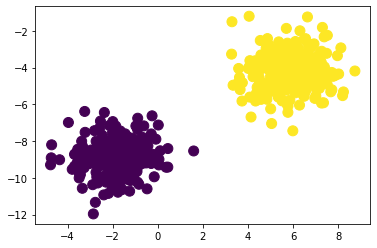

In [116]:
plt.scatter(X[:,0],X[:,1],c=y_pred,s=100)

### Case 2 Not Separable

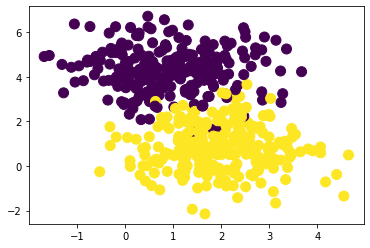

In [117]:
from sklearn.datasets import make_blobs
X,y = make_blobs(n_samples=500, centers = 2, n_features = 2, random_state=0)

import matplotlib.pyplot as plt
plt.scatter(X[:,0],X[:,1],c=y,s=100)

In [118]:
model = LinearSVC()

In [119]:
model.fit(X,y)
y_pred = model.predict(X)

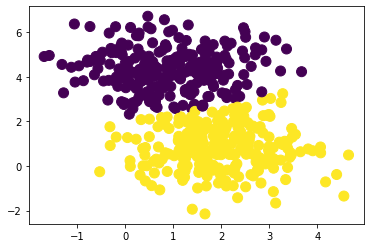

In [120]:
plt.scatter(X[:,0],X[:,1],c=y_pred,s=100)

In [151]:
model.w

array([ 0.53797585, -1.19046712])

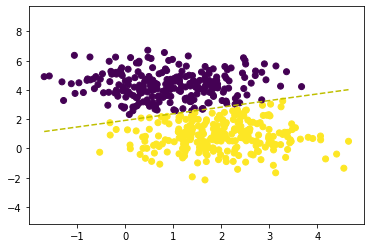

In [153]:
def visualize_svm():
    def get_hyperplane_value(x, w, b, offset):
        return (-w[0] * x + b + offset) / w[1]

    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    plt.scatter(X[:, 0], X[:, 1], marker="o", c=y_pred)

    x0_1 = np.amin(X[:, 0])
    x0_2 = np.amax(X[:, 0])

    x1_1 = get_hyperplane_value(x0_1, model.w, model.b, -4.6)
    x1_2 = get_hyperplane_value(x0_2, model.w, model.b, -4.6)


    ax.plot([x0_1, x0_2], [x1_1, x1_2], "y--")


    x1_min = np.amin(X[:, 1])
    x1_max = np.amax(X[:, 1])
    ax.set_ylim([x1_min - 3, x1_max + 3])

    plt.show()

visualize_svm()